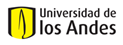
 
 # PROYECTO FINAL
 

## DEEP LEARNING Y REDES NEURONAL (MIIA-4406)

### Erika Marcela Angel Gordillo -201620012

### Camilo E. Prada Ladino -201021153

## Maestría en Inteligencia Analítica para la Toma de Decisiones (Analytics)-MIIA


# Movie Genre Classification (images)

Evaluation

1. 10% Create a solution using both images and text with a Machine Learning algorithm

2. 40% Create a solution using both images and text with a Deep Learning algorithm (CNN, transfer learning, RNN)

3. 30% Presentation (5 slides)

4. 20% Performance in the Kaggle competition (Normalized acording to class performance in the private leaderboard)

## 2. CNN AND TRANSFER LEARNING

We import here all the libraries that we need

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
import os
%matplotlib inline

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import io
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
import os
%matplotlib inline
import tensorflow as tf

C:\Users\ERIKA ANGEL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import pandas as pd
import os
import numpy as np
from skimage import io
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import History
from keras.utils import np_utils
from livelossplot import PlotLossesKeras
from keras.optimizers import RMSprop
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
%matplotlib inline

# Read Data

As you could see in the table below, the data train and test are in a csv files,so it will necesary to join The train and test images along with the labels are loaded and stored in variables in that format.

In [4]:
path='C:/Users/ERIKA ANGEL/Desktop/final/'

In [5]:
dataTraining = pd.read_csv(os.path.join(path, 'data', 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [6]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [7]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


With the train and test data specified in the csv files below, they are used to divide the data into test and train imagenes respectively.

In [7]:
import PIL
from PIL import Image
import glob
import piexif

def images_train(path,genres, px):  
    img = Image.open(path)
    img = img.resize(px)
    image = np.array(img)
    X_train.append(image)
    y_train.append(np.array([genres]))
    
def images_test(path,genres, px):  
    img = Image.open(path)
    img = img.resize(px)
    image = np.array(img)
    X_test.append(image)
    y_test.append(np.array([genres])) 

In [12]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [9]:
y_genres.shape

(7895, 24)

In [10]:
X_train = []
y_train = []
for i in dataTraining.index:
    images_train(os.path.join(path, 'images_resize_gray/', str(i) + '_resize_gray.jpeg'),0,(150,150))
   

In [11]:
X_test = []
y_test = []
for i in dataTesting.index:
    images_test(os.path.join(path, 'images_resize_gray/', str(i) + '_resize_gray.jpeg'),0,(150,150))

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape, y_train.shape

((7895, 150, 150), (7895, 1))

In [13]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape, y_test.shape

((3383, 150, 150), (3383, 1))

From the above output, you can see that the training data has a shape of 11278 x 150 x 150 since there are 11278 training samples each of 150 x 150 dimension. Similarly, the test data has a shape of 3383 x 150 x 150 since there are 3383 testing samples.

Now we need to convert the class labels into a one-hot encoding vector.
In one-hot encoding, we convert the categorical data into a vector of numbers. The reason why we convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. we generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

For our problem statement, the one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 24. The important thing to note here is that the vector consists of all zeros except for the class that it represents, and for that, it is 1. For example, the ankle boot image that we plotted above has a label of 24.

In [14]:
from keras.utils import to_categorical
nb_classes = 24
y_train = to_categorical(y_train,nb_classes)
y_test = to_categorical(y_test,nb_classes)

In [15]:
print('Original label:', y_train [0])

Original label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## images

As you could see in the above plot, the images are grayscale images have pixel values that range from 0 to 255. Also, these images have a dimension of 150 x 150. As a result, we need to preprocess the data before you feed it into the model

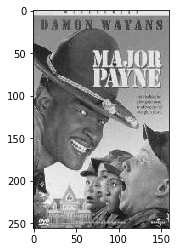

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('images_resize_gray/0_resize_gray.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)

In [17]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', X_train.shape, y_train.shape)

print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (7895, 150, 150) (7895, 24)
Testing data shape :  (3383, 150, 150) (3383, 24)


As a first step, convert each 150 x 150 image of the train and test set into a matrix of size 150 x 150 x 1 which is fed into the network.

In [18]:
X_train = X_train.reshape(-1, 150,150, 1)
X_test = X_test.reshape(-1, 150,150, 1)
X_train.shape, X_test.shape

((7895, 150, 150, 1), (3383, 150, 150, 1))

The data right now is in an int8 format, so before we feed it into the network we need to convert its type to float32, and also have to rescale the pixel values in range 0 - 1 inclusive. 

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

In [20]:
X_train.shape,y_test.shape,y_train.shape,y_test.shape

((7895, 150, 150, 1), (3383, 24), (7895, 24), (3383, 24))

## CNN

The Network

The images are of size 150 x 150. You convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 150 x 150 x 1, and feed this as an input to the network.

We use three convolutional layers:

The first layer will have 32-3 x 3 filters,
The second layer will have 64-3 x 3 filters and
The third layer will have 128-3 x 3 filters.
In addition, there are three max-pooling layers each of size 2 x 2.

In [21]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [22]:
batch_size = 35
epochs = 2
num_classes = 24

In [24]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers. SGD(),metrics=['accuracy'])

In [25]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 128)       73856     
__________

In [26]:
fashion_train = fashion_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 7895 samples, validate on 3383 samples
Epoch 1/2
7105/7895 [=========================>....] - ETA: 29:14 - loss: 3.1820 - acc: 0.0000e+ - ETA: 20:27 - loss: 2.8789 - acc: 0.5000   - ETA: 16:48 - loss: 2.5530 - acc: 0.66 - ETA: 15:20 - loss: 2.0776 - acc: 0.75 - ETA: 14:24 - loss: 1.6879 - acc: 0.80 - ETA: 13:49 - loss: 1.4257 - acc: 0.83 - ETA: 13:27 - loss: 1.2299 - acc: 0.85 - ETA: 13:02 - loss: 1.0836 - acc: 0.87 - ETA: 12:37 - loss: 0.9660 - acc: 0.88 - ETA: 12:16 - loss: 0.8719 - acc: 0.90 - ETA: 11:57 - loss: 0.7947 - acc: 0.90 - ETA: 11:40 - loss: 0.7294 - acc: 0.91 - ETA: 11:35 - loss: 0.6743 - acc: 0.92 - ETA: 11:25 - loss: 0.6272 - acc: 0.92 - ETA: 11:16 - loss: 0.5861 - acc: 0.93 - ETA: 11:09 - loss: 0.5504 - acc: 0.93 - ETA: 11:02 - loss: 0.5185 - acc: 0.94 - ETA: 10:56 - loss: 0.4910 - acc: 0.94 - ETA: 10:53 - loss: 0.4654 - acc: 0.94 - ETA: 10:48 - loss: 0.4423 - acc: 0.95 - ETA: 10:42 - loss: 0.4217 - acc: 0.95 - ETA: 10:37 - loss: 0.4028 - acc: 0.95 - ETA: 10:3

6510/7895 [=======================>......] - ETA: 11:39 - loss: 3.5672e-04 - acc: 1.00 - ETA: 11:21 - loss: 2.3398e-04 - acc: 1.00 - ETA: 11:22 - loss: 5.6326e-04 - acc: 1.00 - ETA: 11:05 - loss: 4.6436e-04 - acc: 1.00 - ETA: 11:03 - loss: 4.1324e-04 - acc: 1.00 - ETA: 11:01 - loss: 3.6751e-04 - acc: 1.00 - ETA: 10:50 - loss: 3.4581e-04 - acc: 1.00 - ETA: 10:46 - loss: 3.3890e-04 - acc: 1.00 - ETA: 10:45 - loss: 3.6431e-04 - acc: 1.00 - ETA: 10:49 - loss: 3.3802e-04 - acc: 1.00 - ETA: 10:49 - loss: 4.0196e-04 - acc: 1.00 - ETA: 10:49 - loss: 3.8924e-04 - acc: 1.00 - ETA: 10:47 - loss: 3.8638e-04 - acc: 1.00 - ETA: 10:50 - loss: 3.6970e-04 - acc: 1.00 - ETA: 10:44 - loss: 4.2813e-04 - acc: 1.00 - ETA: 10:40 - loss: 4.5565e-04 - acc: 1.00 - ETA: 10:36 - loss: 5.1980e-04 - acc: 1.00 - ETA: 10:33 - loss: 5.1263e-04 - acc: 1.00 - ETA: 10:30 - loss: 4.9030e-04 - acc: 1.00 - ETA: 10:24 - loss: 4.8470e-04 - acc: 1.00 - ETA: 10:19 - loss: 4.7786e-04 - acc: 1.00 - ETA: 10:13 - loss: 4.6018e-04 -

7895/7895 [==============================] - ETA: 1:47 - loss: 3.1570e-04 - acc: 1.000 - ETA: 1:44 - loss: 3.1739e-04 - acc: 1.000 - ETA: 1:41 - loss: 3.1603e-04 - acc: 1.000 - ETA: 1:39 - loss: 3.1450e-04 - acc: 1.000 - ETA: 1:36 - loss: 3.1697e-04 - acc: 1.000 - ETA: 1:33 - loss: 3.1547e-04 - acc: 1.000 - ETA: 1:30 - loss: 3.1469e-04 - acc: 1.000 - ETA: 1:27 - loss: 3.1336e-04 - acc: 1.000 - ETA: 1:24 - loss: 3.1228e-04 - acc: 1.000 - ETA: 1:22 - loss: 3.1078e-04 - acc: 1.000 - ETA: 1:19 - loss: 3.0981e-04 - acc: 1.000 - ETA: 1:16 - loss: 3.0836e-04 - acc: 1.000 - ETA: 1:13 - loss: 3.0687e-04 - acc: 1.000 - ETA: 1:10 - loss: 3.0630e-04 - acc: 1.000 - ETA: 1:08 - loss: 3.0553e-04 - acc: 1.000 - ETA: 1:05 - loss: 3.0488e-04 - acc: 1.000 - ETA: 1:02 - loss: 3.0369e-04 - acc: 1.000 - ETA: 1:00 - loss: 3.0259e-04 - acc: 1.000 - ETA: 57s - loss: 3.0130e-04 - acc: 1.000 - ETA: 54s - loss: 3.0038e-04 - acc: 1.00 - ETA: 51s - loss: 2.9944e-04 - acc: 1.00 - ETA: 48s - loss: 3.0013e-04 - acc: 1

In [27]:
test_eval = fashion_model.evaluate(X_test, y_test,verbose=0)

In [28]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.0002126450689115908
Test accuracy: 1.0


the test accuracy looks good. However,  the model looked like it was overfitting. Are these results really all that good. so a Test accurancy of 1 could be a problem. for that problem we can  Adding Dropout into the Network, Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly. This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

## Adding Dropout into the Network

In [31]:
batch_size = 100
epochs = 5
num_classes = 24

In [32]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(150,150,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [33]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 38, 38, 64)        0         
__________

In [34]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [35]:
fashion_train_dropout = fashion_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))

Train on 7895 samples, validate on 3383 samples
Epoch 1/5
7895/7895 [==============================] - ETA: 24:04 - loss: 3.1907 - acc: 0.04 - ETA: 23:34 - loss: 1.6036 - acc: 0.52 - ETA: 22:44 - loss: 1.0692 - acc: 0.68 - ETA: 21:41 - loss: 0.8019 - acc: 0.76 - ETA: 19:51 - loss: 0.6415 - acc: 0.80 - ETA: 18:50 - loss: 0.5346 - acc: 0.84 - ETA: 18:14 - loss: 0.4582 - acc: 0.86 - ETA: 17:18 - loss: 0.4009 - acc: 0.88 - ETA: 16:30 - loss: 0.3564 - acc: 0.89 - ETA: 15:56 - loss: 0.3208 - acc: 0.90 - ETA: 15:27 - loss: 0.2916 - acc: 0.91 - ETA: 15:00 - loss: 0.2673 - acc: 0.92 - ETA: 14:34 - loss: 0.2467 - acc: 0.92 - ETA: 14:05 - loss: 0.2291 - acc: 0.93 - ETA: 13:40 - loss: 0.2138 - acc: 0.93 - ETA: 13:15 - loss: 0.2005 - acc: 0.94 - ETA: 12:55 - loss: 0.1887 - acc: 0.94 - ETA: 12:36 - loss: 0.1782 - acc: 0.94 - ETA: 12:14 - loss: 0.1688 - acc: 0.94 - ETA: 11:59 - loss: 0.1604 - acc: 0.95 - ETA: 11:45 - loss: 0.1527 - acc: 0.95 - ETA: 11:31 - loss: 0.1458 - acc: 0.95 - ETA: 11:17 - loss

7895/7895 [==============================] - ETA: 11:15 - loss: 1.1921e-07 - acc: 1.00 - ETA: 12:17 - loss: 1.1921e-07 - acc: 1.00 - ETA: 12:05 - loss: 1.1921e-07 - acc: 1.00 - ETA: 12:20 - loss: 1.1921e-07 - acc: 1.00 - ETA: 12:12 - loss: 1.1921e-07 - acc: 1.00 - ETA: 12:19 - loss: 1.1921e-07 - acc: 1.00 - ETA: 12:15 - loss: 1.1921e-07 - acc: 1.00 - ETA: 12:17 - loss: 1.1921e-07 - acc: 1.00 - ETA: 12:03 - loss: 1.1921e-07 - acc: 1.00 - ETA: 11:57 - loss: 1.1921e-07 - acc: 1.00 - ETA: 11:46 - loss: 1.1921e-07 - acc: 1.00 - ETA: 11:32 - loss: 1.1921e-07 - acc: 1.00 - ETA: 11:21 - loss: 1.1921e-07 - acc: 1.00 - ETA: 11:12 - loss: 1.1921e-07 - acc: 1.00 - ETA: 11:12 - loss: 1.1921e-07 - acc: 1.00 - ETA: 11:07 - loss: 1.1921e-07 - acc: 1.00 - ETA: 11:14 - loss: 1.1921e-07 - acc: 1.00 - ETA: 11:08 - loss: 1.1921e-07 - acc: 1.00 - ETA: 11:11 - loss: 1.1921e-07 - acc: 1.00 - ETA: 11:07 - loss: 1.1921e-07 - acc: 1.00 - ETA: 11:01 - loss: 1.1921e-07 - acc: 1.00 - ETA: 10:53 - loss: 1.1921e-07 -

In [36]:
test_eval = fashion_model.evaluate(X_test, y_test, verbose=1)

3383/3383 [==============================] - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 58 - ETA: 57 - ETA: 56 - ETA: 55 - ETA: 54 - ETA: 53 - ETA: 53 - ETA: 52 - ETA: 51 - ETA: 50 - ETA: 49 - ETA: 48 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 44 - ETA: 43 - ETA: 42 - ETA: 41 - ETA: 41 - ETA: 40 - ETA: 39 - ETA: 38 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 34 - ETA: 33 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 20 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 16 - ETA: 15 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  -

In [37]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.1920928955078125e-07
Test accuracy: 1.0


Conclusions: when we submit predictions in kaggle the accurancy is 0.50. 

## TRANSFER LEARNING VGG16

In [8]:
images=os.listdir(os.path.join(path, 'images_resize_gray'))
indx= dataTraining.index

In [9]:
from keras.preprocessing import image

images_w = []
for img in images:
    img_path=os.path.join(path, 'images_resize_gray', img)  
    img = image.load_img(img_path, target_size=(80, 80))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_w.append(x)

In [10]:
x=images_w
x = np.vstack( x )
x = x[indx]
x.shape

(7895, 80, 80, 3)

In [13]:
y = y_genres
y = np.vstack( y )
y.shape

(7895, 24)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=13)

In [15]:
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [16]:
X_train_new = model_vgg16.predict(X_train)
X_train_new.shape

(5289, 2, 2, 512)

In [17]:
X_test_new = model_vgg16.predict(X_test)
X_test_new.shape

(2606, 2, 2, 512)

In [18]:
X_new = model_vgg16.predict(x)
X_new.shape

(7895, 2, 2, 512)

In [19]:
indxt = dataTesting.index
xt = images_w
xt = np.vstack( xt )
xt = xt[indxt]
xt.shape

(3383, 80, 80, 3)

In [20]:
Xt_new = model_vgg16.predict(xt)
Xt_new.shape

(3383, 2, 2, 512)

In [28]:
model2 = Sequential()
model2.add(Flatten(input_shape=(2,2,512)))
model2.add(Dense(units=256, input_dim=1))
model2.add(Activation('linear'))
model2.add(Dropout(0.5))      
model2.add(Dense(units=24, input_dim=1))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               524544    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 24)                6168      
_________________________________________________________________
activation_5 (Activation)    (None, 24)                0         
Total params: 530,712
Trainable params: 530,712
Non-trainable params: 0
_________________________________________________________________


In [33]:
model2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [34]:
model2.fit(X_new, y, epochs=50, verbose = 2)

Epoch 1/50
 - 81s - loss: 37.8239 - acc: 0.3035
Epoch 2/50
 - 3s - loss: 37.8239 - acc: 0.3035
Epoch 3/50
 - 3s - loss: 37.8260 - acc: 0.3035
Epoch 4/50
 - 4s - loss: 37.8239 - acc: 0.3035
Epoch 5/50
 - 4s - loss: 37.8239 - acc: 0.3035
Epoch 6/50
 - 4s - loss: 37.8260 - acc: 0.3035
Epoch 7/50
 - 4s - loss: 37.8239 - acc: 0.3035
Epoch 8/50
 - 4s - loss: 37.8239 - acc: 0.3035
Epoch 9/50
 - 4s - loss: 37.8239 - acc: 0.3035
Epoch 10/50
 - 4s - loss: 37.8260 - acc: 0.3035
Epoch 11/50
 - 4s - loss: 37.8260 - acc: 0.3035
Epoch 12/50
 - 4s - loss: 37.8260 - acc: 0.3035
Epoch 13/50
 - 4s - loss: 37.8239 - acc: 0.3035
Epoch 14/50
 - 4s - loss: 37.8260 - acc: 0.3035
Epoch 15/50
 - 4s - loss: 37.8239 - acc: 0.3035
Epoch 16/50
 - 4s - loss: 37.8260 - acc: 0.3035
Epoch 17/50
 - 4s - loss: 37.8239 - acc: 0.3035
Epoch 18/50
 - 4s - loss: 37.8260 - acc: 0.3035
Epoch 19/50
 - 4s - loss: 37.8239 - acc: 0.3035
Epoch 20/50
 - 4s - loss: 37.8260 - acc: 0.3035
Epoch 21/50
 - 4s - loss: 37.8239 - acc: 0.3035


In [32]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres =  model2.predict(Xt_new)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_RF4.csv', index_label='ID')